In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('data_final.csv')

In [8]:
pos  = len(df[df['sentiment_'] == 1])
neu = len(df[df['sentiment_']== 0])
neg = len(df[df['sentiment_']== -1])

Analisis Sentimen


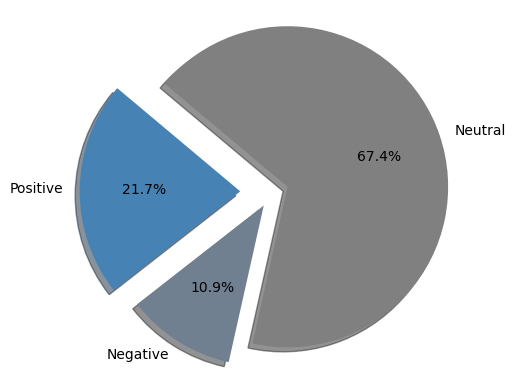

In [10]:
print('Analisis Sentimen')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['steelblue', 'slategray', 'gray']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()